## Import

In [ ]:
!pip uninstall tensorflow

In [ ]:
!pip install tensorflow==1.13.1

# 1.선형 회귀

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [22]:
tf.__version__

'1.13.1'


## 1)Prepare the data

In [23]:
x_data = datasets.load_boston().data[:, 12] # 12:13으로 열지 않아 행만 존제하는 1차원 리스트로 나옴
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data, y_data]).transpose()
df.head

<bound method NDFrame.head of         0     1
0    4.98  24.0
1    9.14  21.6
2    4.03  34.7
3    2.94  33.4
4    5.33  36.2
..    ...   ...
501  9.67  22.4
502  9.08  20.6
503  5.64  23.9
504  6.48  22.0
505  7.88  11.9

[506 rows x 2 columns]>

## 2)Build the model

In [24]:
# reset prarameter theta

w = tf.Variable(tf.random_normal([1])) # 정규분포에서 1개를 랜덤하게 뽑아줌 
b = tf.Variable(tf.random_normal([1])) 

y_predicted = w * x_data + b

## 3)Set the criterion

In [25]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data)) # Mean Squared Error
optimizer = tf.train.GradientDescentOptimizer(0.001) # vanila Gradient Descent Optimizer // adam, adagrad, momentum ~~~ optimizer
train = optimizer.minimize(loss) # associate loss, optimize, minimize

## 4)Train the model

In [27]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variable 초기화

    for step in range(10000):
        sess.run(train) # Gradient Descent가 실행되는 코드
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}:'.format(sess.run(loss)))
            print()

    w_out, b_out = sess.run([w, b])

Step 0: w [1.0662621] b [2.11578]
loss 293.3562316894531:

Step 1000: w [0.254208] b [14.495329]
loss 135.53297424316406:

Step 2000: w [-0.20547612] b [22.151981]
loss 75.58277893066406:

Step 3000: w [-0.48969093] b [26.885956]
loss 52.66535568237305:

Step 4000: w [-0.6654173] b [29.812914]
loss 43.90453338623047:

Step 5000: w [-0.77406543] b [31.622593]
loss 40.555511474609375:

Step 6000: w [-0.8412415] b [32.7415]
loss 39.275245666503906:

Step 7000: w [-0.88277507] b [33.433296]
loss 38.78583526611328:

Step 8000: w [-0.90845466] b [33.861023]
loss 38.59874725341797:

Step 9000: w [-0.9243309] b [34.125465]
loss 38.5272331237793:



## 5)Visualize the result

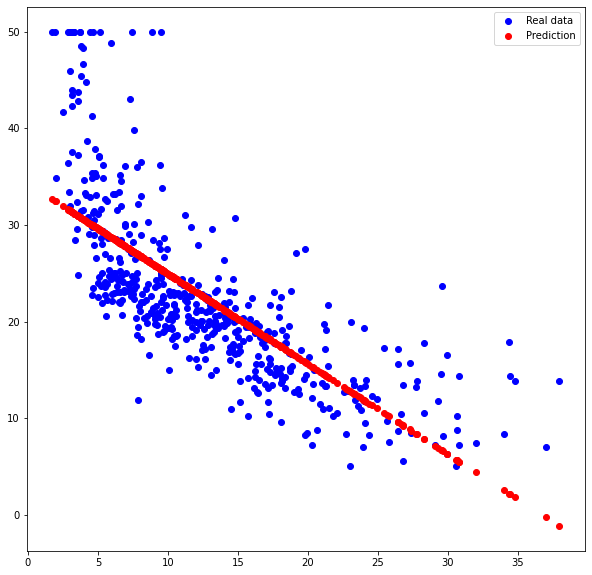

In [29]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

# 2.Logistic Regression

## 1)Prepare the data

In [2]:
x_data = datasets.load_boston().data[:, 12] # 12:13으로 열지 않아 행만 존제하는 1차원 리스트로 나옴
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data, y_data]).transpose()
df.head

<bound method NDFrame.head of         0     1
0    4.98  24.0
1    9.14  21.6
2    4.03  34.7
3    2.94  33.4
4    5.33  36.2
..    ...   ...
501  9.67  22.4
502  9.08  20.6
503  5.64  23.9
504  6.48  22.0
505  7.88  11.9

[506 rows x 2 columns]>

## 2)Build the model

In [ ]:
_x_data = tf.reshape(x_data, [len])